# New Section

In [1]:

import pandas as pd
data = pd.read_csv("/content/asthma_data.csv")




In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Display the first few rows of the dataset
df = data
df.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
# Inspect the data types of each column
print(df.dtypes)

# Find any columns that are not numeric but should be
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print('-' * 40)


PatientID                   int64
Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
DoctorInCharge             object
dtype: object


Shape of the dataset: (2392, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyH

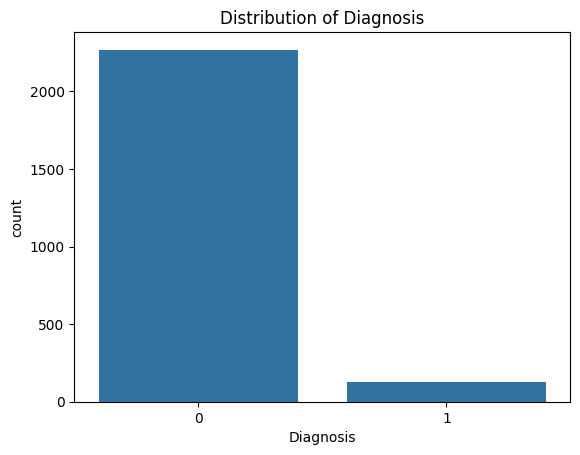

In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display basic information about the dataset
df.info()

# Display basic statistical details
df.describe()

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Visualize the distribution of the target variable 'Diagnosis'
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()


In [5]:
if 'DoctorInCharge' in df.columns:
    df = df.drop('DoctorInCharge', axis=1)

# Verify the column is dropped
print("Columns in the dataset after dropping 'DoctorInCharge':")
print(df.columns)

# Display first few rows to confirm changes
print("First few rows of the dataset after dropping 'DoctorInCharge':")
print(df.head())


Columns in the dataset after dropping 'DoctorInCharge':
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')
First few rows of the dataset after dropping 'DoctorInCharge':
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       5034   63       0          1               0  15.848744        0   
1       5035   26       1          2               2  22.757042        0   
2       5036   57       0          2               1  18.395396        0   
3       5037   40       1          2               1  38.5

In [6]:
# Define the features (X) and the target variable (y)
X = df.drop('Diagnosis', axis=1)  # Using all columns except 'Diagnosis' as features
y = df['Diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1913, 27)
Testing set shape: (479, 27)


Random Forest Model:
Accuracy: 0.9352818371607515
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.17      0.09      0.11        23

    accuracy                           0.94       479
   macro avg       0.56      0.53      0.54       479
weighted avg       0.92      0.94      0.93       479



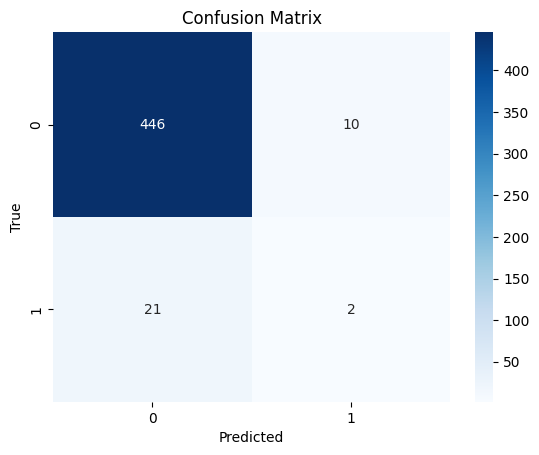

SVM Model:
Accuracy: 0.9352818371607515
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       456
           1       0.33      0.35      0.34        23

    accuracy                           0.94       479
   macro avg       0.65      0.66      0.65       479
weighted avg       0.94      0.94      0.94       479



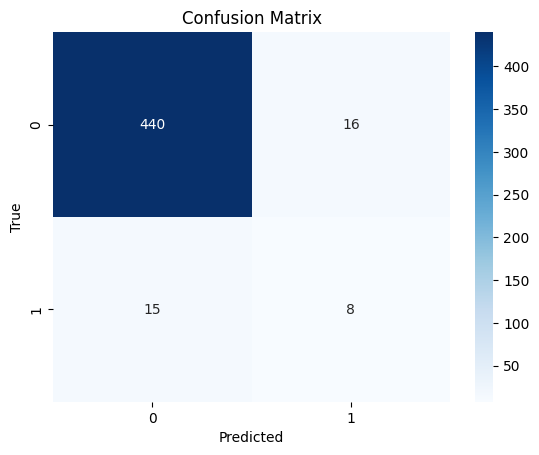

KNN Model:
Accuracy: 0.9498956158663883
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       456
           1       0.47      0.39      0.43        23

    accuracy                           0.95       479
   macro avg       0.72      0.68      0.70       479
weighted avg       0.95      0.95      0.95       479



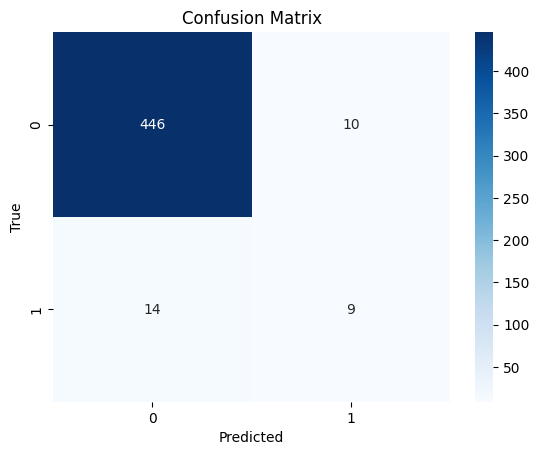

Random Forest Accuracy: 0.9352818371607515
SVM Accuracy: 0.9352818371607515
KNN Accuracy: 0.9498956158663883


<ipython-input-7-b7dbd990a350>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


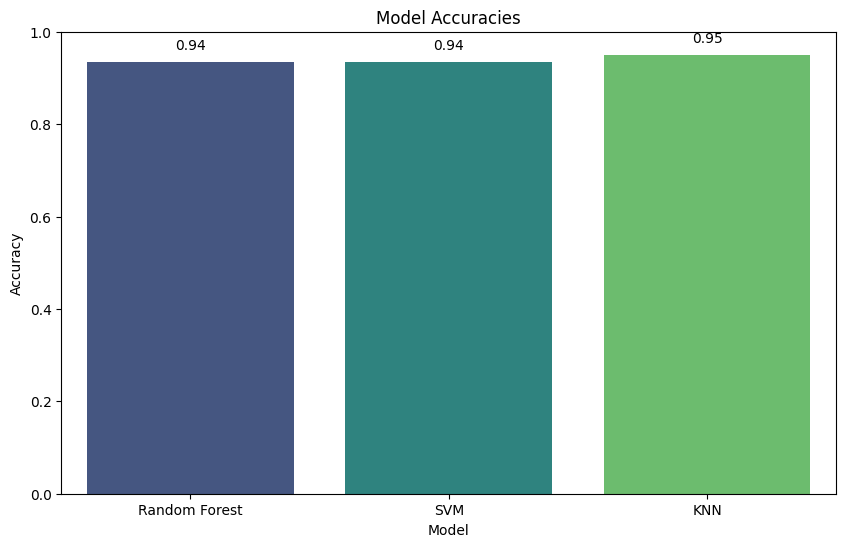

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#svm
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

#knn
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 8: Make predictions
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Step 9: Evaluate the model
def evaluate_model(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  print("Accuracy:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, pred))

# Step 10: Confusion matrix
def plot_confusion_matrix(y_test, pred):
  conf_matrix = confusion_matrix(y_test, pred)
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

  #evalution and confusion matrix for ramdom forest
print("Random Forest Model:")
evaluate_model(y_test, rf_pred)
plot_confusion_matrix(y_test, rf_pred)

#evalution and confusion matrix for svm
print("SVM Model:")
evaluate_model(y_test, svm_pred)
plot_confusion_matrix(y_test, svm_pred)

#evalution and confusion matrix for knn
print("KNN Model:")
evaluate_model(y_test, knn_pred)
plot_confusion_matrix(y_test, knn_pred)


# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)

# Plot the accuracies
models = ['Random Forest', 'SVM', 'KNN']
accuracies = [rf_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis range to [0, 1] for clarity
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.02, f'{accuracies[i]:.2f}', ha='center', va='bottom')
plt.show()